In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as wdg
from mpl_toolkits.mplot3d import Axes3D
import ipyvolume as ipv
from IPython.display import display
from IPython.display import clear_output

In [ ]:
%matplotlib inline

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150

# Affine Sets
A set $C$ is affine if the line between any two points is contained within the se $C$.  More generally, and equally, any hyperplane through any k distinct points in $C$ lie in $C$ i.e for all $x_1, x_2,...,x_k \in C$ and $\theta_i$ such that $\sum_{i=1}^k\theta_i = 1$, $\theta_1 x_1 + \theta_2 x_2 + ... + \theta_k x_k \in C$ (We call these points $\textit{affine combinations}$).  Note that this definition really is saying that all points on the hyperplane lie in $C$ and not the plane itself as $C$ is a set of points. Below, mess around with the two dimensional case of the affine set $\mathbb{R}^2$, where we see that for any two $x_1,x_2$, $\theta x_1 + (1-\theta) x_2 \in \mathbb{R}^2$ and is on the line between $x_1$ and $x_2$.

In [ ]:
def f(theta, x_1_x, x_1_y, x_2_x, x_2_y):
    run = (x_1_x - x_2_x)
    rise = (x_1_y - x_2_y)
    plt.plot((x_1_x), (x_1_y), 'ro-')
    plt.plot((x_2_x), (x_2_y), 'ro-')
    plt.plot((x_1_x + 20 * run , x_2_x - 20 * run), (x_1_y + 20 * rise, x_2_y - 20 * rise), 'bo-')
    plt.plot((theta * x_1_x + (1-theta) * x_2_x), (theta * x_1_y + (1-theta) * x_2_y), 'go-')
    plt.ylim(0,10)
    plt.xlim(0,10)
wdg.interact(f, theta = (-9, 15, .2), x_1_x = (0,10,.5), x_1_y = (0,10,.5), x_2_x = (0,10,.5), x_2_y = (0,10,.5))

The $\textit{affine hull}$ of a set $C \subset \mathbb{R}^n$, denoted $\textbf{aff} C$, is the set of all affine combinations of points in the set, $\{\theta_1 x_1 + \theta_2 x_2 + ... + \theta_k x_k | x_1, x_2,...,x_k \in C,\sum_{i=1}^k\theta_i = 1 \}$.  Here we see the three dimensional example of a trio of points determining the set of points within a triangle, $C$, whose affine hull is a plane (use the button to generate new triangle sets!).  This is equivalent to saying it is the smallest affine set containing $C$.

In [130]:
ipv.figure()
def render(evt):
    ipv.clear()
    clear_output()
    x = np.random.rand(1,3)
    y = np.random.rand(1,3)
    z = np.random.rand(1,3)
    # plot three points
    ipv.scatter(x, y, z, marker='sphere', size=1)
    triangles = [(0, 1, 2)]
    
    # get plane equation
    p1, p2, p3 = np.array([x[0][0], y[0][0], z[0][0]]),  np.array([x[0][1], y[0][1], z[0][1]]), np.array([x[0][2], y[0][2], z[0][2]])
    v1 = p3 - p1
    v2 = p2 - p1
    
    # the cross product is a vector normal to the plane
    cp = np.cross(v1, v2)
    a, b, c = cp
    # This evaluates a * x3 + b * y3 + c * z3 which equals d
    d = np.dot(cp, p3)
    u = np.linspace(-2, 14, 5)
    v = np.linspace(-2, 14, 5)
    X, Y = np.meshgrid(u, v)

    Z = (d - a * X - b * Y) / c
    
    # plot plane and ball
    ipv.plot_surface(X,Y,Z, color='rgb(0,0,200)')
    ipv.plot_trisurf(x, y, z, triangles=triangles, color='orange')
    theta = np.random.rand(1,1)[0][0]
    x_circle = np.array([theta * x[0][0] + ((1 - theta) / 2) * x[0][1] + ((1 - theta) / 2) * x[0][2]])
    y_circle = np.array([theta * y[0][0] + ((1 - theta) / 2) * y[0][1] + ((1 - theta) / 2) * y[0][2]])
    z_circle = (d - a*x_circle -b*y_circle) / c
    ipv.scatter(x_circle, y_circle, z_circle, marker='sphere', size=6, color='green')
    ipv.xyzlim(0, 1)
    ipv.show()
    
    button = wdg.Button(description="New Points for a Hull!")
    output = wdg.Output()
    display(button, output)
    button.on_click(render)

button = wdg.Button(description="New Points for a Hull!")
output = wdg.Output()
button.on_click(render)
display(button, output)

[0.62801268]


Button(description='New Points for a Hull!', style=ButtonStyle())

Output()

We call the $\textit{relative interior}$ of the set $C$ as
$\textbf{relint}C = \{x \in C | B(x,r) \cap \textbf{aff} C \subset C$ for some $r > 0\}$. For the above example in $\mathbb{R}^3$, the interior of $C$ is empty but the relative interior is not, being the triangle itself.  An open set of the relative interior, for example, is given as the intersection of the green ball and the triangle.

# Convex Sets
A set $C$ is $\textit{convex}$ if the set of points on the line segment through any two distinct points in $C$ lie in $C$ i.e for any $x_1,x_2 \in C$, $\theta x_1 + (1-\theta) x_2 \in C$ for any $\theta <= 1$. Note that every affine set is also convex.  Here you'll notice that although the sliders go out of the range displayed by the convex set in orange, the visualization does not as the range of points is bounded by the set.

In [76]:
from random import random

def f(theta, x_1_x, x_1_y, x_2_x, x_2_y):
    # handling convex set
    x_1_y = min(max(.2 * (x_1_x - 5) ** 2, x_1_y), .2 * (-1) * (x_1_x - 5) ** 2 + 10)
    x_2_y = max(min(.2 * (-1) * (x_2_x - 5) ** 2 + 10, x_2_y), .2 * (x_2_x - 5) ** 2)

    # theta point
    plt.plot((theta * x_1_x + (1-theta) * x_2_x), (theta * x_1_y + (1-theta) * x_2_y), 'go-')

    # line
    run = (x_1_x - x_2_x)
    rise = (x_1_y - x_2_y)
    plt.plot((x_1_x, x_2_x), (x_1_y, x_2_y), 'bo-')
    
    #conxex set
    x = np.arange(-20,20)
    plt.plot(x, .2 * (x - 5) ** 2, 'orange')
    plt.plot(x, .2 * (-1) * (x - 5) ** 2 + 10, 'orange')
    plt.ylim(0,10)
    plt.xlim(0,10)
    
wdg.interact(f, theta = (0, 1, .1), x_1_x = (0,10,.5), x_1_y = (0,10,.5), x_2_x = (0,10,.5), x_2_y = (0,10,.5))

interactive(children=(FloatSlider(value=0.0, description='theta', max=1.0), FloatSlider(value=5.0, description…

<function __main__.f(theta, x_1_x, x_1_y, x_2_x, x_2_y)>

Similar to the affine hull, $\textit{convex hull}$ of a set $C \subset \mathbb{R}^n$, denoted $\textbf{conv} C$, is the set of all $\textit{convex combinations}$ of points in the set, $\{\theta_1 x_1 + \theta_2 x_2 + ... + \theta_k x_k | x_1, x_2,...,x_k \in C,\sum_{i=1}^k\theta_i = 1, \theta_i > 0 \}$.

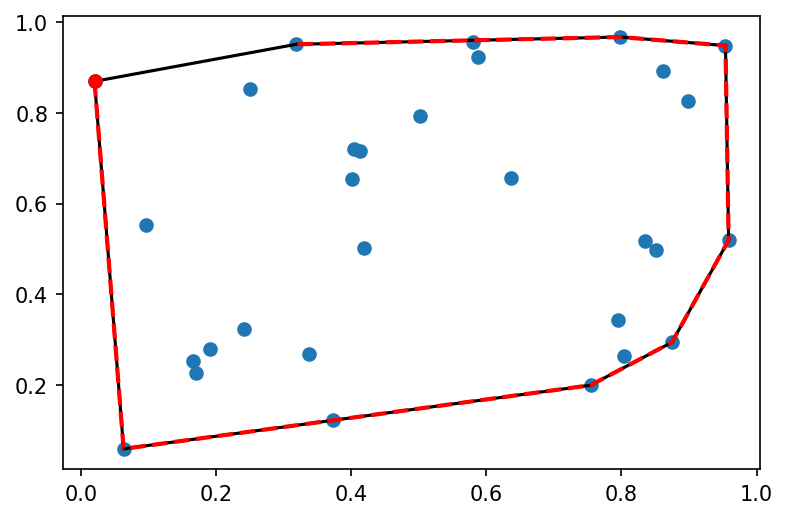

Button(description='New Points for a Hull!', style=ButtonStyle())

Output()

In [75]:
from scipy.spatial import ConvexHull

def render_conv(evt):
    ipv.clear()
    clear_output()
    points = np.random.rand(30, 2)
    hull = ConvexHull(points)
    plt.plot(points[:,0], points[:,1], 'o')

    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

    plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
    plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
    plt.show()
    
    button = wdg.Button(description="New Points for a Hull!")
    output = wdg.Output()
    button.on_click(render_conv)
    display(button, output)

button = wdg.Button(description="New Points for a Hull!")
output = wdg.Output()
button.on_click(render_conv)
display(button, output)

# Cones

A $\textit{cone}$ is a set $C$ if for every $x \in C$ and $\theta \geq 0$, we have that $\theta x \in C$.  A set is called a $\textit{convex cone}$ if for every $x_1, x_2 \in C$ and $\theta_1, \theta_2 \geq 0$, $\theta_1 x_1 + \theta_2 x_2 \in C$.  In other words, if the point and all points on its ray throught the origin are in $C$.  For exmaple, a line in 2 dimensions is a cone, and a plane in three.  Or, just two lines can be a cone, which is what distinguishes it from an affine set - two lines one their own could not be affine as the affine hull of two lines is a plane, and the affine hull is the smallest such affine set containing a set.  An example of a conex cone would  be a "pie slice" in two dimensions with the point of the pie at the origin.

In a familiar way, we can define the $\textit{conic hull}$ as the set of all $\textit{conic combinations}$ of points in a set $C$: $\{\theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n | \theta_i \geq 0,  x_i \in C\}$

# Hyperplanes and Halfspaces

A hyperplane is a set of the form $\{x | a^Tx = b\}$ i.e the non trivial solution set to a linear equation.  In equivalent, this can be seen as the set of vectors with constant inner product with respect to some normal vector, $a$.  The constant $b$ determines distance from the origin.  To see this interpetation better, simply subtract from both sides to ge thte equivalent representation: $\{x | a^T(x - x_0) = 0\} = x_0 + a^{\perp}$ where $a^T x_0 = b$ and $a^{\perp}$ is the set of vectors orthogonal to $a$, $\{v | a^T v = 0\}$.

A hyperplane $S$ of dimension $n-1$ divides $\mathbb{R}^n$ into two $\textit{halfspaces}$ i.e a set $\{x | a^Tx \leq b\}$ and a set  $\{x | a^Tx \geq b\}$ (note these are closed, but removing the equals part would make them open).  Halfspaces are convex but not affine.  Doing a similar interpretation-trick, we can rewrite the definition as $\{x | a^T(x - x_0) \geq 0\}$ to see that the angle must be acute for one half-plane (and obtuse for the other) as $a^T(x - x_0) \geq 0 = \|a^T\|\|(x - x_0)\|cos(\theta) \geq 0$ which implies that $cos(\theta) \geq 0$.

# Norms and the Sets They Define

$\textit{Euclidean Balls}$ have the form $B(x_0, r) = \{x | (x-x_0)^T(x-x_0) = \|x-x_0\|_2 \leq r\}$ and are convex sets by the triangle inequality - indeed any norm is a convex function and the sets defined by them ($\textit{norm-balls}$) are as well.  Similarly, $\textit{ellipsoids}$ are also convex, $\{x | (x-x_0)^TP^{-1}(x-x_0) \leq 1\}$, where $P$ is positive definite and symmetric.  Note that balls are just ellipsoids with $P = r^2I$.  Finally, we can define the $norm-cone$ to be the set $\{(x,t) | \|x\| \leq t\}$.  Note that norm-cones can be thought of as origin-centered norm-balls, projected along all $r$ (or equivalently, every level-slice in the final coordinate of a norm-cone is a norm-ball).  Note in the below example, that as the $p \rightarrow \infty$, we see that the norm-ball becomes more of a square - indeed, this is what the infiity norm looks like.

In [173]:
ipv.figure()
def f(p):
    ipv.clear()
    X = np.arange(-2, 2, 0.05*1)
    Y = np.arange(-2, 2, 0.05*1)
    X, Y = np.meshgrid(X, Y)
    R = np.power(np.abs(X)**p + np.abs(Y)**p, 1/p)
    ipv.plot_surface(X, R, Y, color="orange")
    X = np.arange(-2, 2, 0.25*1)
    Y = np.arange(-2, 2, 0.25*1)
    X, Y = np.meshgrid(X, Y)
    R = 0 * X + .5
    ipv.plot_surface(X, R, Y, color="blue")
    ipv.xyzlim(-2, 2)
    ipv.show()

wdg.interact(f, p = (.0001, 20, .5))

interactive(children=(FloatSlider(value=9.5001, description='p', max=20.0, min=0.0001, step=0.5), Output()), _…

<function __main__.f(p)>

## Polyhedra
A $\textit{polyhedron}$ is the intersection of a finite number of halfplanes and hyperplanes: 

$P = \{x | a_i^T x \leq b_i, c_i x = d_i, i \leq k\} = \{Ax \preceq b, Cx = d\}$


## Simplex
Let $v_0, ..., v_k$ be $k+1$ points such that $v_1 - v_0, ..., v_k - v_0$ are lineary independent: then the convex hull of these points is referred to as a $\textit{simplex}$.  A very common example is the $\textit{probability simplex}$ determined by the $n$ unit vectors, $0\preceq x, \textbf{1} x = 1$ (note that this is a (n-1) dimensional space, like a triangle in 3-space).  Any vector in this simplex represents the categorical distribution on $n$ elements given by each $i$th component.

In [157]:
def new_dist(evt):
    ipv.clear()
    clear_output()
    # 4 vertices for the tetrahedron
    x = np.array([1, 0, 0])
    y = np.array([0, 1, 0])
    z = np.array([0, 0, 1])
    # and 4 surfaces (triangles), where the number refer to the vertex index
    triangles = [(0, 1, 2)]
    ipv.figure()
    # we draw the tetrahedron
    mesh = ipv.plot_trisurf(x, y, z, triangles=triangles, color='orange')
    ipv.xyzlim(0, 2)
    x_point = np.array([np.random.uniform(0,1)])
    y_point = np.array([np.random.uniform(0,1 - x_point[0])])
    z_point = 1 - (x_point + y_point)
    ipv.scatter(x_point, y_point, z_point, size=3, marker="sphere", color="blue")
    ipv.show()
    print(f"x coord: {x_point} y_coord: {y_point} z_coord: {z_point}")
    button = wdg.Button(description="New Categorical Distribution")
    output = wdg.Output()
    button.on_click(new_dist)
    display(button, output)

button = wdg.Button(description="New Categorical Distribution")
output = wdg.Output()
button.on_click(new_dist)
display(button, output)

x coord: [0.08925773] y_coord: [0.65362582] z_coord: [0.25711645]


Button(description='New Categorical Distribution', style=ButtonStyle())

Output()

## Positive Semi-Definite Cone
We note here that set of both the $\textit{positive definite}$ and $\textit{positive semi-definite}$ matrices are both cones.  For example, in $\mathbb{R}^{2x2}$, corresponding to a positive semi-definite cone in $\mathbb{R}^3$ we have that

$$
X=\left[\begin{array}{ll}{x} & {y} \\ {y} & {z}\end{array}\right] \in \mathbf{S}_{+}^{2} \quad \Longleftrightarrow \quad x \geq 0, \quad z \geq 0, \quad x z \geq y^{2}
$$

In [174]:
ipv.clear()
X = np.arange(0, 2, 0.05*1)
Z = np.arange(0, 2, 0.05*1)
X, Z = np.meshgrid(X, Z)
Y = np.sqrt(X * Z)
ipv.plot_surface(X, Y, Z, color="orange")
Y = -np.sqrt(X * Z)
ipv.plot_surface(X, Y, Z, color="orange")
x_point = np.array([np.random.uniform(0,1)])
z_point = np.array([np.random.uniform(0,1)])
y_point = 0
while y_point == 0:
    y_point = (np.random.randint(-1,1)) * np.sqrt(x_point * z_point)
ipv.scatter(x_point, y_point, z_point, size=3, marker="sphere", color="blue")
ipv.ylim(-1, 1)
ipv.xlim(0, 1)
ipv.zlim(0, 1)
ipv.show()
print(f"x coord: {x_point} y_coord: {y_point} z_coord: {z_point}\n"
      f"The point on the bounday satisfies {x_point} * {z_point} = {y_point} ^ 2")

x coord: [0.40906611] y_coord: [-0.44209293] z_coord: [0.47778623]
The point on the bounday satisfies [0.40906611] * [0.47778623] = [-0.44209293] ^ 2


# Operations that Preserve Convexity

Below are is quick-list of operations that preserve convexity of set:
    - arbitrary intersetion
    - affine and/or linear transformation
    - projection on to one or more cooridnates
    - scaling and translation
    - summation of two or more convex sets
    - cartesian product of convex sets
Note that we immediately know a few examples from before: polyhedra are the intersection of finitely many halfspaces and hyperplanes, which are convex sets.  Similarly, the projection (or, more geometrically, a cross-section) of a polyhedron is a polyhedron, clearly - think about the above examples where we take a cross-section by intersection with the plane (immediately making it a convex set anyway) - they were all convex by simply looking at them.  Now we will look at two specific cases of convexity-preserving oprations.

## Linear Perspective Functions

A $\textit{linear perspective function}$ is a function that takes a set to a scaled version of it, $f: \mathbb{R}^{n+1} \rightarrow \mathbb{R}^{n}$ where $f(x, t) = \frac{x}{t}$ where $x \in \mathbb{R}^n$, $t \in \mathbb{R}_{++}$.  This is a scaling-projection combo function i.e scale, then project down by one.  Note this function certainly thus preserves convexity.

## Linear Fractional Functions

A $\textit{linear fractional function}$ is a function formed by composing an affine function with a perspective function i.e the perspecive of an affine function.  In other words, if $$g(x) = \left[\begin{array}{l}{A} \\ {c^T}\end{array}\right] x +  \left[\begin{array}{l}{b} \\ {d}\end{array}\right]$$ is a function $\mathbb{R}^{n} \rightarrow \mathbb{R}^{n+1}$, then the function $f = P \circ g = \frac{Ax + b}{c^Tx + d}$ is called a $\textit{linear fractional function}$.